In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [26]:
df = pd.read_csv("C:/Users/micha/Downloads/archive (2)/fraud_financial_project.csv",index_col=0)


C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


isfraud: 1(fraudlent transaction),0(non fraudlent transaction)

In [4]:
df["isFraud"].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

The feature isFlaggedFraus does not contain fraudlent transaction. Which is interesting i'm unsure on why this is the case but it seems that these transactions do not get detected as fraud 

In [5]:
df["isFlaggedFraud"].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [9]:
df.loc[df["isFraud"] == 1].head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [12]:
df["type"].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

We see that whenever a transaction is fraudlent it always of type transfer/cashout
which makes sense fraudlent agents will only be interested in transferring the money and cashing out to profit

In [11]:
df.loc[df["isFraud"] == 1]["type"].value_counts()

CASH_OUT    578
TRANSFER    564
Name: type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E00DF6780>,
      dtype=object)

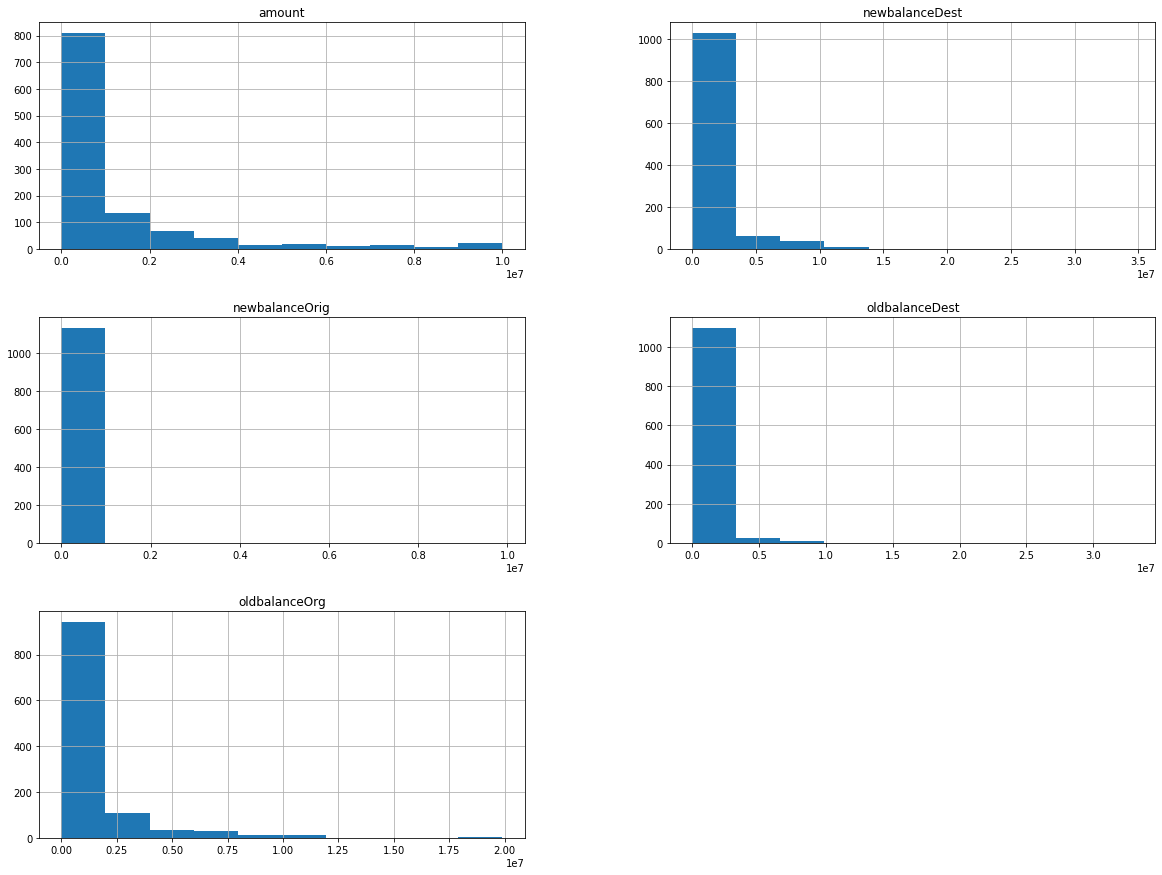

In [17]:
df.loc[df["isFraud"] == 1][["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].hist(figsize=(20,15))

Name of Customers who started transaction and the recepient. I want to see if there is any trend between the two

In [22]:
df.loc[df["isFraud"] == 1][["nameOrig","nameDest"]]

,nameOrig,nameDest
step,,
1,C1305486145,C553264065
1,C840083671,C38997010
1,C1420196421,C972765878
1,C2101527076,C1007251739
1,C137533655,C1848415041
...,...,...
95,C526144262,C79051264
95,C732111322,C1140210295
95,C1000086512,C1759363094


In [26]:
df.loc[df["isFraud"] == 1]["nameDest"].duplicated().sum()

10

In [28]:
df.loc[df["isFraud"] == 1]["nameOrig"].duplicated().sum()

0

In [23]:
df.loc[df["isFraud"] == 1][["nameOrig","nameDest"]].duplicated().sum()

0

So where there are frauds there are duplicates values for these recepients within the dataset.
So these receipents are recieving transactions from different customers making the transactions

In [56]:
Fraudlent_transactions = df.loc[df["isFraud"] == 1]

In [63]:
Fraudlent_transactions

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,0
95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,0
95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,0


In [62]:
Fraudlent_transactions.duplicated().sum()

0

Feature engineering
I want to create new features between the balances to see if we can spot a trend.
Also we will have multicollinearity between our features(oldbalanceOrg,newbalanceOrg)
and(oldbalanceDest,newbalanceDest).

In [20]:
df["balancechangeOrg"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

In [21]:
df["balancechangeDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

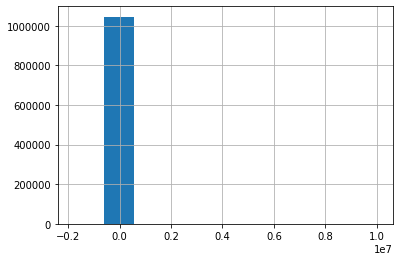

In [22]:
df["balancechangeOrg"].hist()

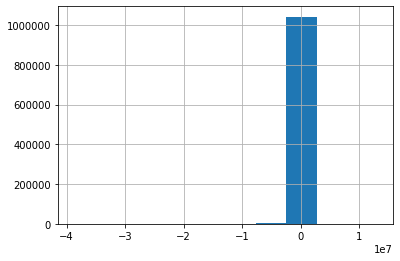

In [23]:
df["balancechangeDest"].hist()

In [24]:
df[["balancechangeOrg","balancechangeDest"]]

,balancechangeOrg,balancechangeDest
step,,
1,9839.64,0.00
1,1864.28,0.00
1,181.00,0.00
1,181.00,21182.00
1,11668.14,0.00
...,...,...
95,132557.35,-132557.35
95,9917.36,0.00
95,14140.05,0.00


steps represent time. Each step means 1 hour of time.

In [8]:
df["type"].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [27]:
df["type"] = df["type"].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})

In [28]:
df["nameOrig"] = df["nameOrig"].apply(lambda x:int(x.strip("C")))

In [29]:
df["nameDest"] = df["nameDest"].apply(lambda x:int(x.strip("C").strip("M")))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 1 to 95
Data columns (total 12 columns):
type                 1048575 non-null int64
amount               1048575 non-null float64
nameOrig             1048575 non-null int64
oldbalanceOrg        1048575 non-null float64
newbalanceOrig       1048575 non-null float64
nameDest             1048575 non-null int64
oldbalanceDest       1048575 non-null float64
newbalanceDest       1048575 non-null float64
isFraud              1048575 non-null int64
isFlaggedFraud       1048575 non-null int64
balancechangeOrg     1048575 non-null float64
balancechangeDest    1048575 non-null float64
dtypes: float64(7), int64(5)
memory usage: 104.0 MB


X will be our independent features
y will be our dependent feature we are trying to predict

We would like to predict which features are fraudlent or not

In [161]:
y = df[["isFraud"]]
x = df[["type","amount","nameOrig","nameDest","newbalanceDest","oldbalanceDest","newbalanceOrig","oldbalanceOrg"]]

In [44]:
y

,isFraud
step,
1,0
1,0
1,1
1,1
1,0
...,...
95,0
95,0
95,0


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=25)

In [163]:
dummy = DummyClassifier(strategy="most_frequent")

In [164]:
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [165]:
pred_d = dummy.predict(X_test)
pred_d

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
dummy.score(X_test,y_test)

0.9988441467285156

In [20]:
np.unique(pred_d)

array([0], dtype=int64)

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score             # it correctly classified 261841 labels 
accuracy_score(y_test,pred_d,normalize=False)


261841

In [169]:
from sklearn.linear_model import LogisticRegression 
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier

We will use logisticRegression and Classifier models to classify fraudlent transactions

In [168]:
lgr = LogisticRegression()

In [172]:
lgr.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We see that the model has overfitted. Which means there is high variance among our features. Are features are likely highly correlatted with each other. We will find significant features to keep in our model. It also possible because of imbalanced labels between fraudlent and non fraudlent tranaction. I will try to address this issue as well.

In [173]:
lgr.score(X_test,y_test)

0.9990577697753906

In [174]:
lpred= lgr.predict(X_test)

In [9]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [12]:
selector = RFE(lgr,n_features_to_select=5,step=1)

In [69]:
selector.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [70]:
x.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

RFE is a feature selection methods that allows us to determine which feature is best for our model in this case the logistic Regression model.(1 being the best).
As we can see the features that are considered the best are 

-type
-amount
-oldbalance org
-nameblanceorig
-namebalanceDest

In [72]:
selector.ranking_

array([1, 1, 4, 1, 1, 3, 2, 1])

In [73]:
selector.score(X_train,y_train)

0.9994392387889084

In [31]:
df["isFraud"].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

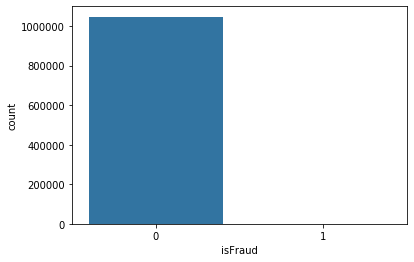

In [51]:
sns.countplot(df["isFraud"])

I believe because our labels is heavily inbalanced this results in overfitting. I will address by resampling

In [136]:
from sklearn.utils import resample

We split up data in train/test before oversampling

In [137]:
X = pd.concat([X_train,y_train],axis=1)

In [33]:
X

,type,amount,nameOrig,nameDest,newbalanceDest,oldbalanceDest,newbalanceOrig,oldbalanceOrg,isFraud
step,,,,,,,,,
35,2,18626.43,1404941626,1425784898,0.00,0.00,22229.57,40856.00,0
13,1,379638.04,1096573243,892118369,194892.52,0.00,0.00,73177.00,0
10,3,272349.62,2067409362,99509209,5779931.39,5219330.26,989569.86,717220.24,0
46,3,141490.26,1106641776,586273406,3970819.31,4112309.57,6299180.25,6157689.99,0
44,1,198702.29,1692326874,1053366010,437141.07,238438.78,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
11,1,49751.66,250239449,515630629,340252.66,103248.96,0.00,0.00,0
34,2,7716.07,504455152,1794446161,0.00,0.00,0.00,0.00,0
6,2,25448.45,343688483,1427580388,0.00,0.00,882732.55,908181.00,0


In [138]:
minority = X.loc[X["isFraud"] == 1]
majority = X.loc[X["isFraud"]== 0]



In [139]:
len(majority)

785592

In [140]:
resampled_minority = resample(minority,n_samples=len(majority),random_state=25)

In [141]:
len(resampled_minority)

785592

In [142]:
new_data = pd.concat([resampled_minority,majority],axis=0)

In [143]:
x1 = new_data.iloc[:,:-1]
y1 = new_data[["isFraud"]]

In [20]:
y1

,isFraud
step,
34,1
93,1
34,1
1,1
31,1
...,...
11,0
34,0
6,0


In [145]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,random_state=25)

In [39]:
lgr.fit(X1_train,y1_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

After resampling we see that our model performance decrease as a result it appears to not overfit

In [40]:
lgr.score(X1_train,y1_train)

0.9081949239130066

In [41]:
lgr.fit(X1_test,y1_test)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
lgr.score(X1_test,y1_test)

0.9083035468792962

In [42]:
pred1 = lgr.predict(X1_test)

Confusion matrix is used within classification. It allows us to visualize the performance of our model.Confusion matrix to test the performance on our model with the actual value. We want to see which how much we correctly labeled as fraud and the ones we falsly labeled as fraudlent

In [157]:
from sklearn.metrics import confusion_matrix


188932 - True postive(correctly predicted as postive)
167846 - True negative 

In [46]:
confusion_matrix(y1_test,pred1)

array([[188932,   7335],
       [ 28683, 167846]], dtype=int64)

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
tree = DecisionTreeClassifier()

In [50]:
tree.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We see that decision tree overfits on the data

In [51]:
tree.score(X1_train,y1_train)

1.0

In [ ]:
tree.predict(X1_train,y1_train)

In [52]:
tree.score(X1_test,y1_test)

0.9998930742675587

In [112]:
rtree = RandomForestClassifier()

In [58]:
rtree.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rtree.score(X_test,y_test)

0.9995651245117188

Overall I still expect the model to overfit due to high variance. I believe there are unneccessary features in our dataset. We will use PCA which is an unsupervised learning algorithm for dimensionality reduction. It will tells us which features are useful and reduce the dimensionality of features. PCA is very useful when working with a dataset with 

We will use Minka's mle to guess the number of components to have

Before performing PCA we must scale our variables

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
pca = PCA(n_components = 'mle',svd_solver = 'full',)

In [79]:
scaler = StandardScaler()

In [80]:
pipe = Pipeline([("scaler",scaler),("pc",pca)])

In [81]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pc',
                 PCA(copy=True, iterated_power='auto', n_components='mle',
                     random_state=None, svd_solver='full', tol=0.0,
                     whiten=False))],
         verbose=False)

In [88]:
pca.components_

array([[ 2.80563997e-01,  2.43446311e-01, -1.43051597e-03,
         4.81874949e-04,  4.58802873e-01,  4.60859665e-01,
         4.69033805e-01,  4.68114346e-01],
       [-1.52735053e-01,  2.29527419e-01,  3.18236707e-03,
         1.92578036e-03,  4.91512265e-01,  4.64576568e-01,
        -4.83534920e-01, -4.82445456e-01],
       [ 6.55868890e-01,  6.53438894e-01,  8.86753220e-03,
        -2.42673854e-02, -1.78232877e-01, -2.46395496e-01,
        -1.56525745e-01, -1.58770479e-01],
       [ 1.63000115e-02,  1.36529950e-02, -7.11911404e-01,
         7.01875536e-01, -4.01925781e-03, -5.73876370e-03,
        -5.05586908e-03, -5.11285175e-03],
       [ 8.78331686e-03,  5.76996711e-03,  7.02204232e-01,
         7.11879391e-01, -3.31749876e-03, -3.93257071e-03,
         1.61694608e-04,  1.09201477e-04],
       [-6.83480998e-01,  6.74319477e-01, -7.40458394e-04,
         2.36343184e-03, -7.74371730e-02, -1.66068543e-01,
         1.40587379e-01,  1.57482528e-01],
       [ 1.49708178e-02, -7.828771

In [83]:
X1_train.columns

Index(['type', 'amount', 'nameOrig', 'nameDest', 'newbalanceDest',
       'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg'],
      dtype='object')

Explained the amount of variance explained by the components

In [89]:
pca.explained_variance_

array([2.31603532, 1.92660006, 1.09842593, 1.00140027, 0.99852356,
       0.64197893, 0.01623756])

In [90]:
pipe.fit_transform(X_train)

array([[-8.17931516e-01, -2.60272316e-01, -1.09539209e-01, ...,
         7.81720823e-01, -3.01917859e-01,  3.26697690e-03],
       [-7.32204446e-01,  2.43696918e-01,  1.16571752e-01, ...,
        -1.81196907e-01,  1.30855394e+00, -6.06962482e-02],
       [ 2.10224667e+00,  1.77098744e+00,  1.74301094e-01, ...,
         8.95424197e-03, -8.38422001e-01,  7.35511092e-02],
       ...,
       [-5.38402456e-01, -5.38913549e-01, -1.99039004e-01, ...,
        -4.18710948e-01, -1.97053666e-01,  5.90640077e-03],
       [ 3.12205088e+00,  4.29874115e+00, -2.71806029e+00, ...,
         1.01204235e+00, -6.98322885e-01, -9.39474901e-02],
       [-6.09434468e-01,  3.82232670e-01,  7.37896176e-02, ...,
         9.84225918e-01,  1.27793315e+00, -7.71645127e-03]])

In [91]:
pipe.score(X_train)

-6.304258705520337

In [101]:
NX_train = pipe.fit_transform(X_train)

We see after using pca we reduce our variables to from 8 to 7

In [97]:
X_train.shape

(786431, 8)

In [102]:
NX_train.shape

(786431, 7)

In [103]:
lgr.fit(NX_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
lgr.score(NX_train,y_train)

0.9990119921518862

PCA did not do as expected. PCA was not helpful in this case

In [105]:
X.columns

Index(['type', 'amount', 'nameOrig', 'nameDest', 'newbalanceDest',
       'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg', 'isFraud'],
      dtype='object')

In [147]:
X2 = new_data[["type","amount","nameOrig","nameDest","newbalanceDest","oldbalanceDest","newbalanceOrig","oldbalanceOrg"]]
y2 = new_data[["isFraud"]]

In [148]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=25)

In [149]:
tree.fit(X2_train,y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [150]:
rtree.fit(X2_train,y2_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForest and Decision Tree still overfits when we resample our data

In [151]:
tree.score(X2_test,y2_test)

0.9998854367152415

In [152]:
rtree.score(X2_test,y2_test)

0.9999770873430484

Logistic Regression with resampling seems to be the most successful method when attempting to train a model to detect fraud

In [176]:
new_data = pd.concat([resampled_minority,majority],axis=0)
x1 = new_data.iloc[:,:-1]
y1 = new_data[["isFraud"]]

In [177]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,random_state=25)

In [178]:
lgr.fit(X1_train,y1_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
lgr.score(X1_test,y1_test)

0.90862432407662

In [181]:
pred = lgr.predict(X1_test)

In [182]:
prob = lgr.predict_proba(X1_test)

In [183]:
prob

array([[8.08053990e-01, 1.91946010e-01],
       [9.08114797e-01, 9.18852028e-02],
       [8.21698216e-01, 1.78301784e-01],
       ...,
       [9.90318938e-14, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [4.39488662e-04, 9.99560511e-01]])

In [186]:
new_data["predictions"] = pd.Series(pred)

In [187]:
new_data

,type,amount,nameOrig,nameDest,newbalanceDest,oldbalanceDest,newbalanceOrig,oldbalanceOrg,isFraud,predictions
step,,,,,,,,,,
34,1,30917.39,1257352420,984948607,370843.82,339926.42,0.00,30917.39,1,0
93,4,4120.14,2002472710,2023856876,0.00,0.00,0.00,4120.14,1,0
34,1,1016540.35,1455982049,1613524189,5700161.74,4463851.64,0.00,1016540.35,1,0
1,4,25071.46,669700766,1384210339,0.00,0.00,0.00,25071.46,1,0
31,4,21516.38,551376615,2121782042,0.00,0.00,0.00,21516.38,1,1
...,...,...,...,...,...,...,...,...,...,...
11,1,49751.66,250239449,515630629,340252.66,103248.96,0.00,0.00,0,0
34,2,7716.07,504455152,1794446161,0.00,0.00,0.00,0.00,0,0
6,2,25448.45,343688483,1427580388,0.00,0.00,882732.55,908181.00,0,0


In [155]:
from sklearn.cluster import KMeans